<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [ ]:
rand_sample1 = np.array([[random.uniform(-4,1), random.uniform(-2,4),1] for i in range(100)]).T
rand_sample2 = np.array([[random.uniform(-1,4), random.uniform(-2,4),1] for i in range(100)]).T
rand_sample3 = np.array([[random.uniform(-3,3), random.uniform(-4,0),1] for i in range(100)]).T
rand_sample = np.concatenate((rand_sample1,rand_sample2,rand_sample3),axis=1)
rand_target = np.concatenate((np.zeros(100),np.zeros(100)+1.0,np.zeros(100)+2.0),axis=0)

# Linear Classifier with Least-Squares Method

In [ ]:
class linear_normal_equation():

  def train(self, x, t):
    self.X = np.matrix(x)
    t_onehot = []
    for i in t:
      tmp = np.zeros(int(max(t))+1)
      tmp[int(i)] = 1
      t_onehot.append(tmp)
    self.T = np.matrix(t_onehot)
    self.W = (self.X * self.X.T).I * self.X * self.T
  def recognize_max(self, x):
    self.x = np.matrix(x)
    Y = self.x * self.W
    return np.argmax(Y, axis=1)

In [ ]:
lne1 = linear_normal_equation()
lne1.train(rand_sample, rand_target)

In [ ]:
def boundary(classfier, x, y, error):
  w1 = classfier.W.T[0]
  w2 = classfier.W.T[1]
  w3 = classfier.W.T[2]

  z = np.empty((len(x),len(y)),dtype='float')
  for i in range(len(y)):
    for j in range(len(x)):
      x_v = np.matrix([x[j],y[i],1]).T
      if (abs((w1-w2) * x_v)<=error and (classfier.recognize_max(x_v.T)==0 or classfier.recognize_max(x_v.T)==1)
          or abs((w2-w3) * x_v)<=error and classfier.recognize_max(x_v.T)!=0
          or abs((w3-w1) * x_v)<=error and classfier.recognize_max(x_v.T)!=1):
        z[i][j] = 0
      else:
        z[i][j] = 1
  return  z

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


<a list of 3 text.Text objects>

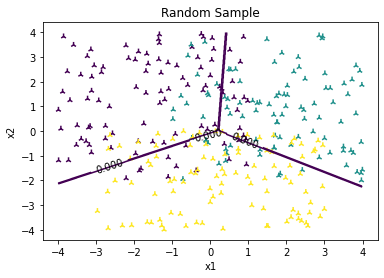

In [ ]:
plt.title("Random Sample")
plt.xlim(-4.4, 4.4)
plt.ylim(-4.4, 4.4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(rand_sample[0], rand_sample[1], c=rand_target, marker='2')
x = np.arange(-4, 4, 0.01)
y = np.arange(-4, 4, 0.01)
z = boundary(lne1, x, y, 0.005)
contour = plt.contour(x, y, z, [0])
plt.clabel(contour, colors=('k'))

This classifier can work well when the data in different classes distribute separately.

In [ ]:
iris_data = datasets.load_iris()
x_iris = np.array([iris_data.data[:,2], iris_data.data[:,3]])
x_bias = np.array([[1 for i in range(x_iris.shape[1])]])
x_iris_b = np.concatenate((x_iris, x_bias), axis=0)

In [ ]:
lne2 = linear_normal_equation()
lne2.train(x_iris_b, iris_data.target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()


<a list of 1 text.Text objects>

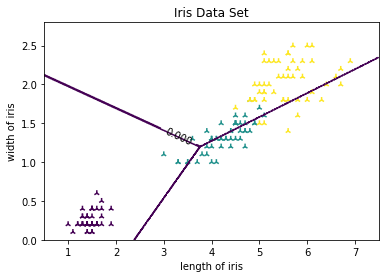

In [ ]:
plt.figure('Iris Data Set')
plt.title('Iris Data Set')
plt.xlim(0.5,7.5)
plt.ylim(0,2.8)
plt.xlabel('length of iris')
plt.ylabel('width of iris')
plt.scatter(x_iris[0], x_iris[1], c = iris_data.target, marker='2')
x1 = np.arange(0.5, 7.5, 0.0125)
y1 = np.arange(0, 2.8, 0.005)
z1 = boundary(lne2, x1, y1, 0.005)
contour = plt.contour(x1, y1, z1, [0])
plt.clabel(contour, colors=('k'))

On this occassion, the data in different classes distribute on a line, the classifier can not works very well.
